d:\UASLP -Semestre 11\TRADUCTOR\S4L\env\Lib\site-packages\keras\src\layers\core\masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 314ms/step - accuracy: 0.0098 - loss: 3.5224 - val_accuracy: 0.0370 - val_loss: 3.5583
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.0226 - loss: 3.4333 - val_accuracy: 0.0000e+00 - val_loss: 3.5780
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.0263 - loss: 3.4033 - val_accuracy: 0.0000e+00 - val_loss: 3.5269
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.1341 - loss: 3.2774 - val_accuracy: 0.0370 - val_loss: 3.4494
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.1755 - loss: 3.2152 - val_accuracy: 0.1111 - val_loss: 3.3480
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.2129 - loss: 3.0825 - val_accuracy: 0.1111 - val_loss: 3.2235
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.2740 - loss: 2.9485 - val_accuracy: 0.0741 - val_loss: 3.1244
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.3246 - loss: 2.8322 - val_accuracy: 0

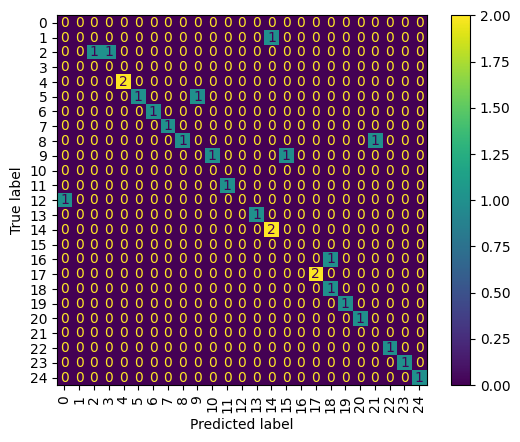

In [17]:
import os
import pandas as pd
import numpy as np
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Masking, Bidirectional
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def extrae_datos():
    contenido=os.listdir('./data/keypoints')
    contenido = np.array(contenido, dtype=str)
    secuencia, etiqueta =[],  []
    for NumPalabra, Palabra in enumerate(contenido):
        Carpeta = contenido[NumPalabra]
        ruta = os.path.join('./data/keypoints', f"{Carpeta}")
        data = pd.read_hdf(ruta, key='data')
        for _, imMues in data.groupby('sample'):
            secDePuntos= [fila['keypoints']for _, fila in imMues.iterrows()]
            secuencia.append(secDePuntos)
            Palabra= Palabra.replace(".h5", "")
            etiqueta.append(NumPalabra)
    return secuencia, etiqueta
contenido=[]
sec, etiqueta = extrae_datos()
secuencia = pad_sequences(sec, 30, padding='post', truncating='post', dtype='float32', value=0.0)
numClases=len(set(etiqueta))
X=np.array(secuencia)
y=to_categorical(etiqueta).astype(int)

modelo = Sequential()
modelo.add(Masking(mask_value=0.0, input_shape=(30, 1119)))
modelo.add(Bidirectional(LSTM(128, return_sequences=True)))
modelo.add(Dropout(0.4))
modelo.add(Bidirectional(LSTM(128, return_sequences=True)))
modelo.add(Dropout(0.4))
modelo.add(Bidirectional(LSTM(128)))
modelo.add(Dense(numClases, activation='softmax'))

optimizer = Adam(learning_rate=0.0001)
modelo.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
historial = modelo.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_val, y_val))

y_pred = modelo.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

modelo.save('./Modelo_Ale.h5')
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(xticks_rotation='vertical')
plt.show()

